# Nenadgledano ucenje - projekat

Dataset: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

1. Priprema podataka

In [1]:
import pandas as pd
import sklearn as scikit
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "../dataset/student-mat.csv"
pd.set_option("display.max_columns", None)
dataframe_math = pd.read_csv(path, low_memory=False, na_values=["?"])
dataframe_math["subject"] = [0]*dataframe_math.shape[0]
dataframe_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0


In [3]:
path = "../dataset/student-por.csv"
dataframe_por = pd.read_csv(path, low_memory=False, na_values=["?"])
dataframe_por["subject"] = [1]*dataframe_por.shape[0]
dataframe_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,1


In [4]:
dataframe=pd.concat([dataframe_math,dataframe_por], axis=0)
dataframe.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0


In [5]:
dataframe.shape

(1044, 34)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [7]:
print("Number Of Rows In The Original DataFrame:", len(dataframe))
print("Number Of Rows After Deduping:", len(dataframe.drop_duplicates()))

Number Of Rows In The Original DataFrame: 1044
Number Of Rows After Deduping: 1044


In [8]:
def get_one_value_cols(df):
    to_drop=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            print(col)
            to_drop.append(col)
    return to_drop

dataframe.drop(get_one_value_cols(dataframe),axis=1,inplace=True)

Enkodiranje

In [9]:
lab_enc = LabelEncoder()
one_hot = LabelBinarizer()

def df_one_hot(df, columns):
    tmp = pd.DataFrame()
    for col in columns:
        res = one_hot.fit_transform(df[col])
        for val in range(0, len(res[0])):
            new_col = res[:, val]
            tmp_col = pd.DataFrame(
                {col + '(' + str(one_hot.classes_[val])+')': new_col})
            tmp = pd.concat((tmp, tmp_col), axis=1)
    return pd.concat((df.reset_index(drop=True), tmp.reset_index(drop=True)), axis=1, join='inner')


In [10]:
lab_coded = ['school','sex','address','Pstatus','schoolsup','famsup',
             'paid','activities','nursery','higher','internet','romantic'
             ,'famsize']
one_coded = ['Mjob','Fjob','reason','guardian']

dataframe_enc = dataframe.copy(deep=True)

for col in lab_coded:
    dataframe_enc[col] = lab_enc.fit_transform(dataframe_enc[col])

dataframe_enc = df_one_hot(dataframe_enc, one_coded)
dataframe_enc.drop(one_coded, axis=1, inplace=True)

dataframe_enc.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,Mjob(at_home),Mjob(health),Mjob(other),Mjob(services),Mjob(teacher),Fjob(at_home),Fjob(health),Fjob(other),Fjob(services),Fjob(teacher),reason(course),reason(home),reason(other),reason(reputation),guardian(father),guardian(mother),guardian(other)
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [11]:
dataframe_enc.shape

(1044, 47)

In [12]:
dataframe_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   school              1044 non-null   int32
 1   sex                 1044 non-null   int32
 2   age                 1044 non-null   int64
 3   address             1044 non-null   int32
 4   famsize             1044 non-null   int32
 5   Pstatus             1044 non-null   int32
 6   Medu                1044 non-null   int64
 7   Fedu                1044 non-null   int64
 8   traveltime          1044 non-null   int64
 9   studytime           1044 non-null   int64
 10  failures            1044 non-null   int64
 11  schoolsup           1044 non-null   int32
 12  famsup              1044 non-null   int32
 13  paid                1044 non-null   int32
 14  activities          1044 non-null   int32
 15  nursery             1044 non-null   int32
 16  higher              1044 non-null   int32


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5]),
 [Text(0, 0.5, 'school'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'age'),
  Text(0, 3.5, 'address'),
  Text(0, 4.5, 'famsize'),
  Text(0, 5.5, 'Pstatus'),
  Text(0, 6.5, 'Medu'),
  Text(0, 7.5, 'Fedu'),
  Text(0, 8.5, 'traveltime'),
  Text(0, 9.5, 'studytime'),
  Text(0, 10.5, 'failures'),
  Text(0, 11.5, 'schoolsup'),
  Text(0, 12.5, 'famsup'),
  Text(0, 13.5, 'paid'),
  Text(0, 14.5, 'activities'),
  Text(0, 15.5, 'nursery'),
  Text(0, 16.5, 'higher'),
  Text(0, 17.5, 'internet'),
  Text(0, 18.5, 'romantic'),
  Text(0, 19.5, 'famrel'),
  Text(0, 20.5, 'freetime'),
  Text(0, 21.5, 'goout'),
  Text(0, 22.5, 'Dalc'),
  Text(0, 23.5, 'Walc'),
  Text(0, 24.5, 'health'),
  

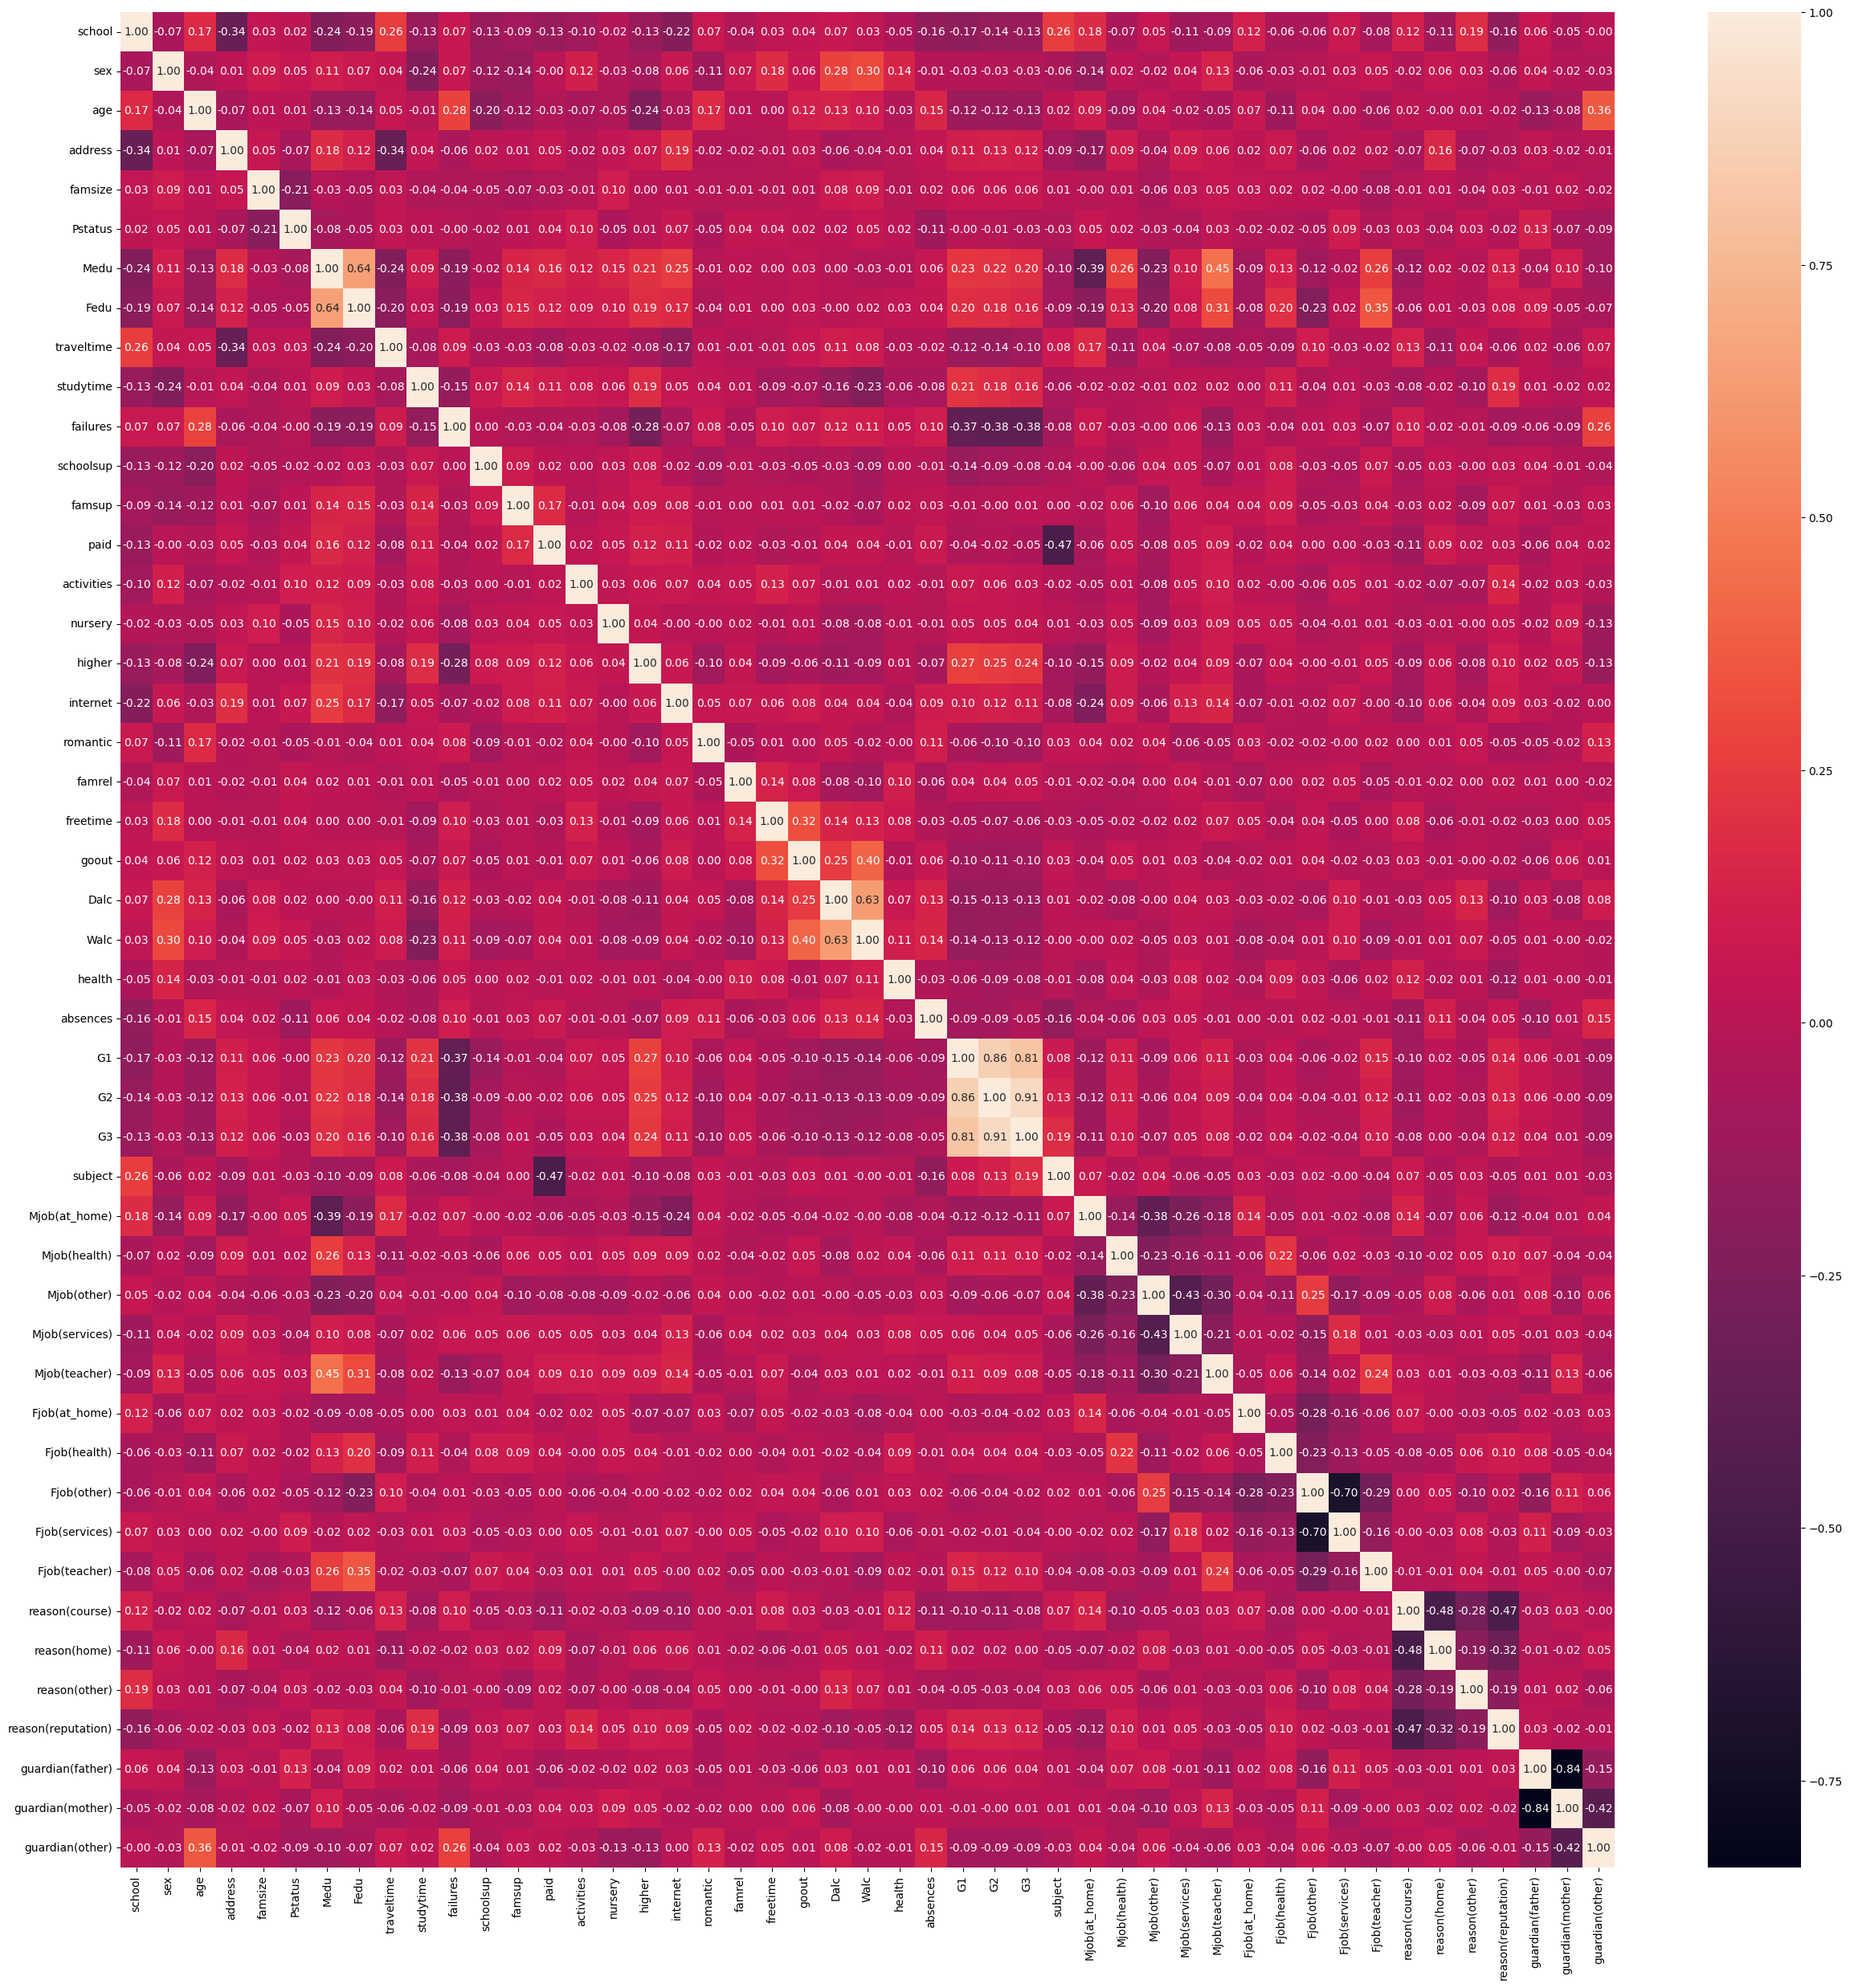

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(dataframe_enc.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

C:\Users\PC\AppData\Local\Temp\ipykernel_8648\85834134.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe_enc["G3"],color='cyan',ax=ax)


Text(0.5, 1.0, 'Distribution of grades')

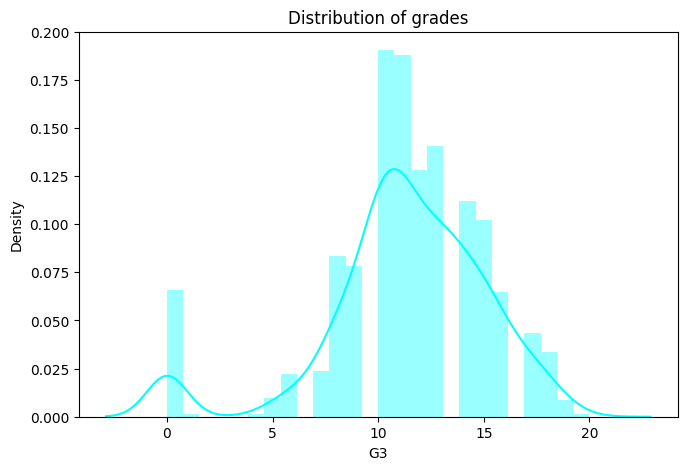

In [14]:
f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(dataframe_enc["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades')

In [15]:
to_plot=[x for x in dataframe_enc.columns if x not in lab_coded and '(' not in x and x != 'subject']
dataframe_enc[to_plot].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<AxesSubplot: >

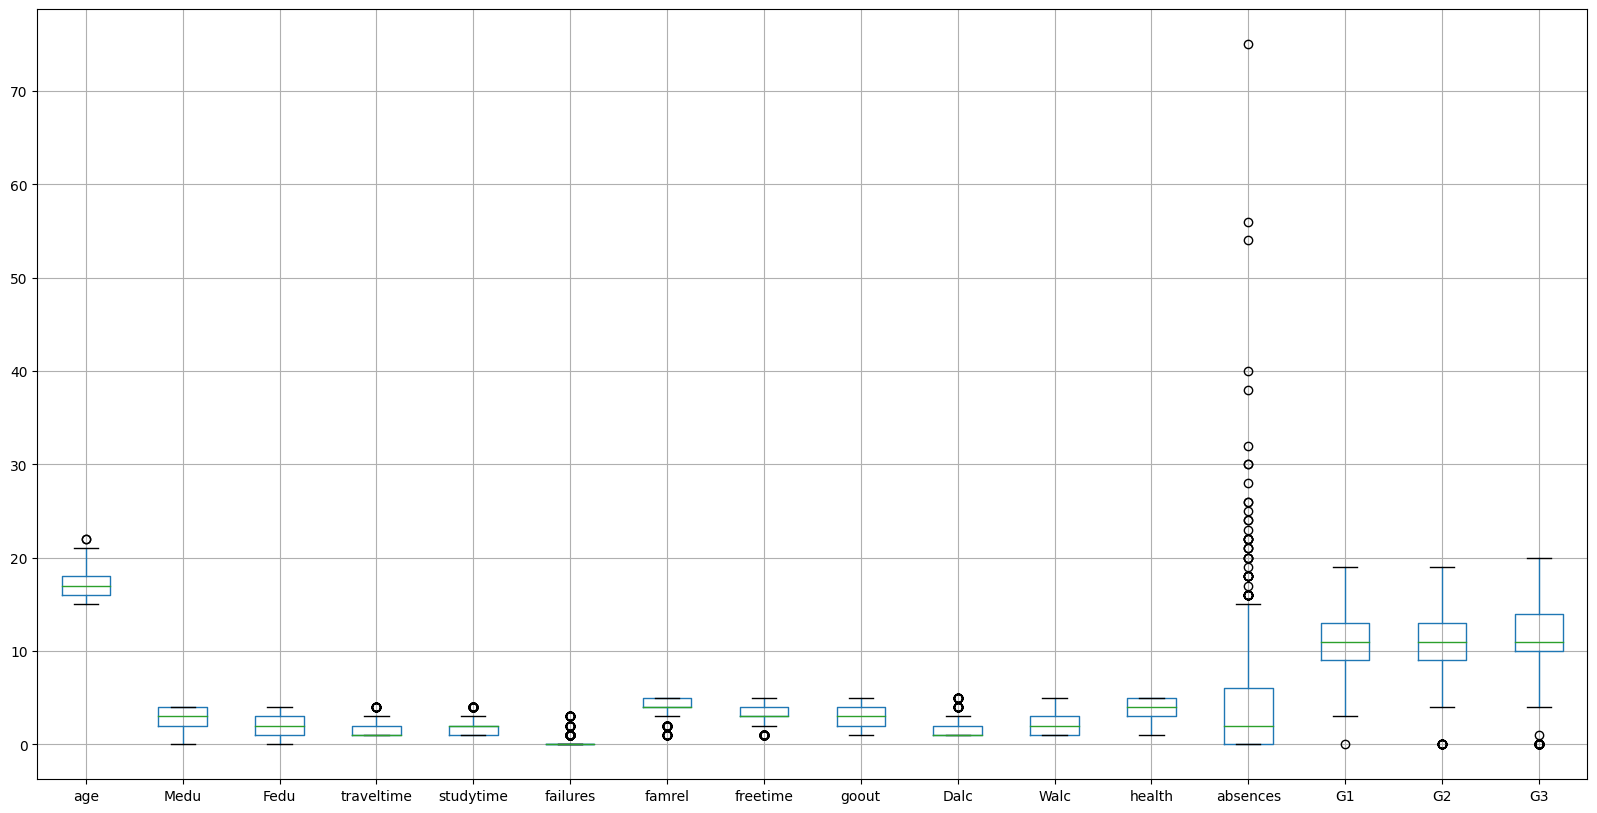

In [16]:
dataframe_enc.boxplot(column=to_plot, figsize=(20,10))

<AxesSubplot: ylabel='sex'>

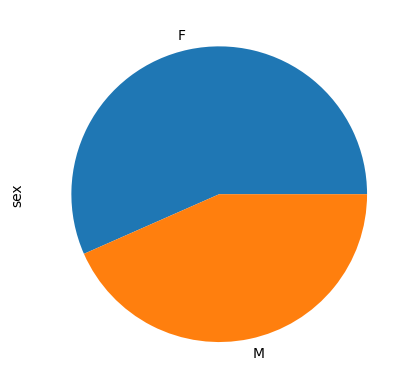

In [17]:
dataframe['sex'].value_counts().plot(kind='pie')



In [18]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize,columnNames):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    # if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    #     columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_8648\1512762025.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


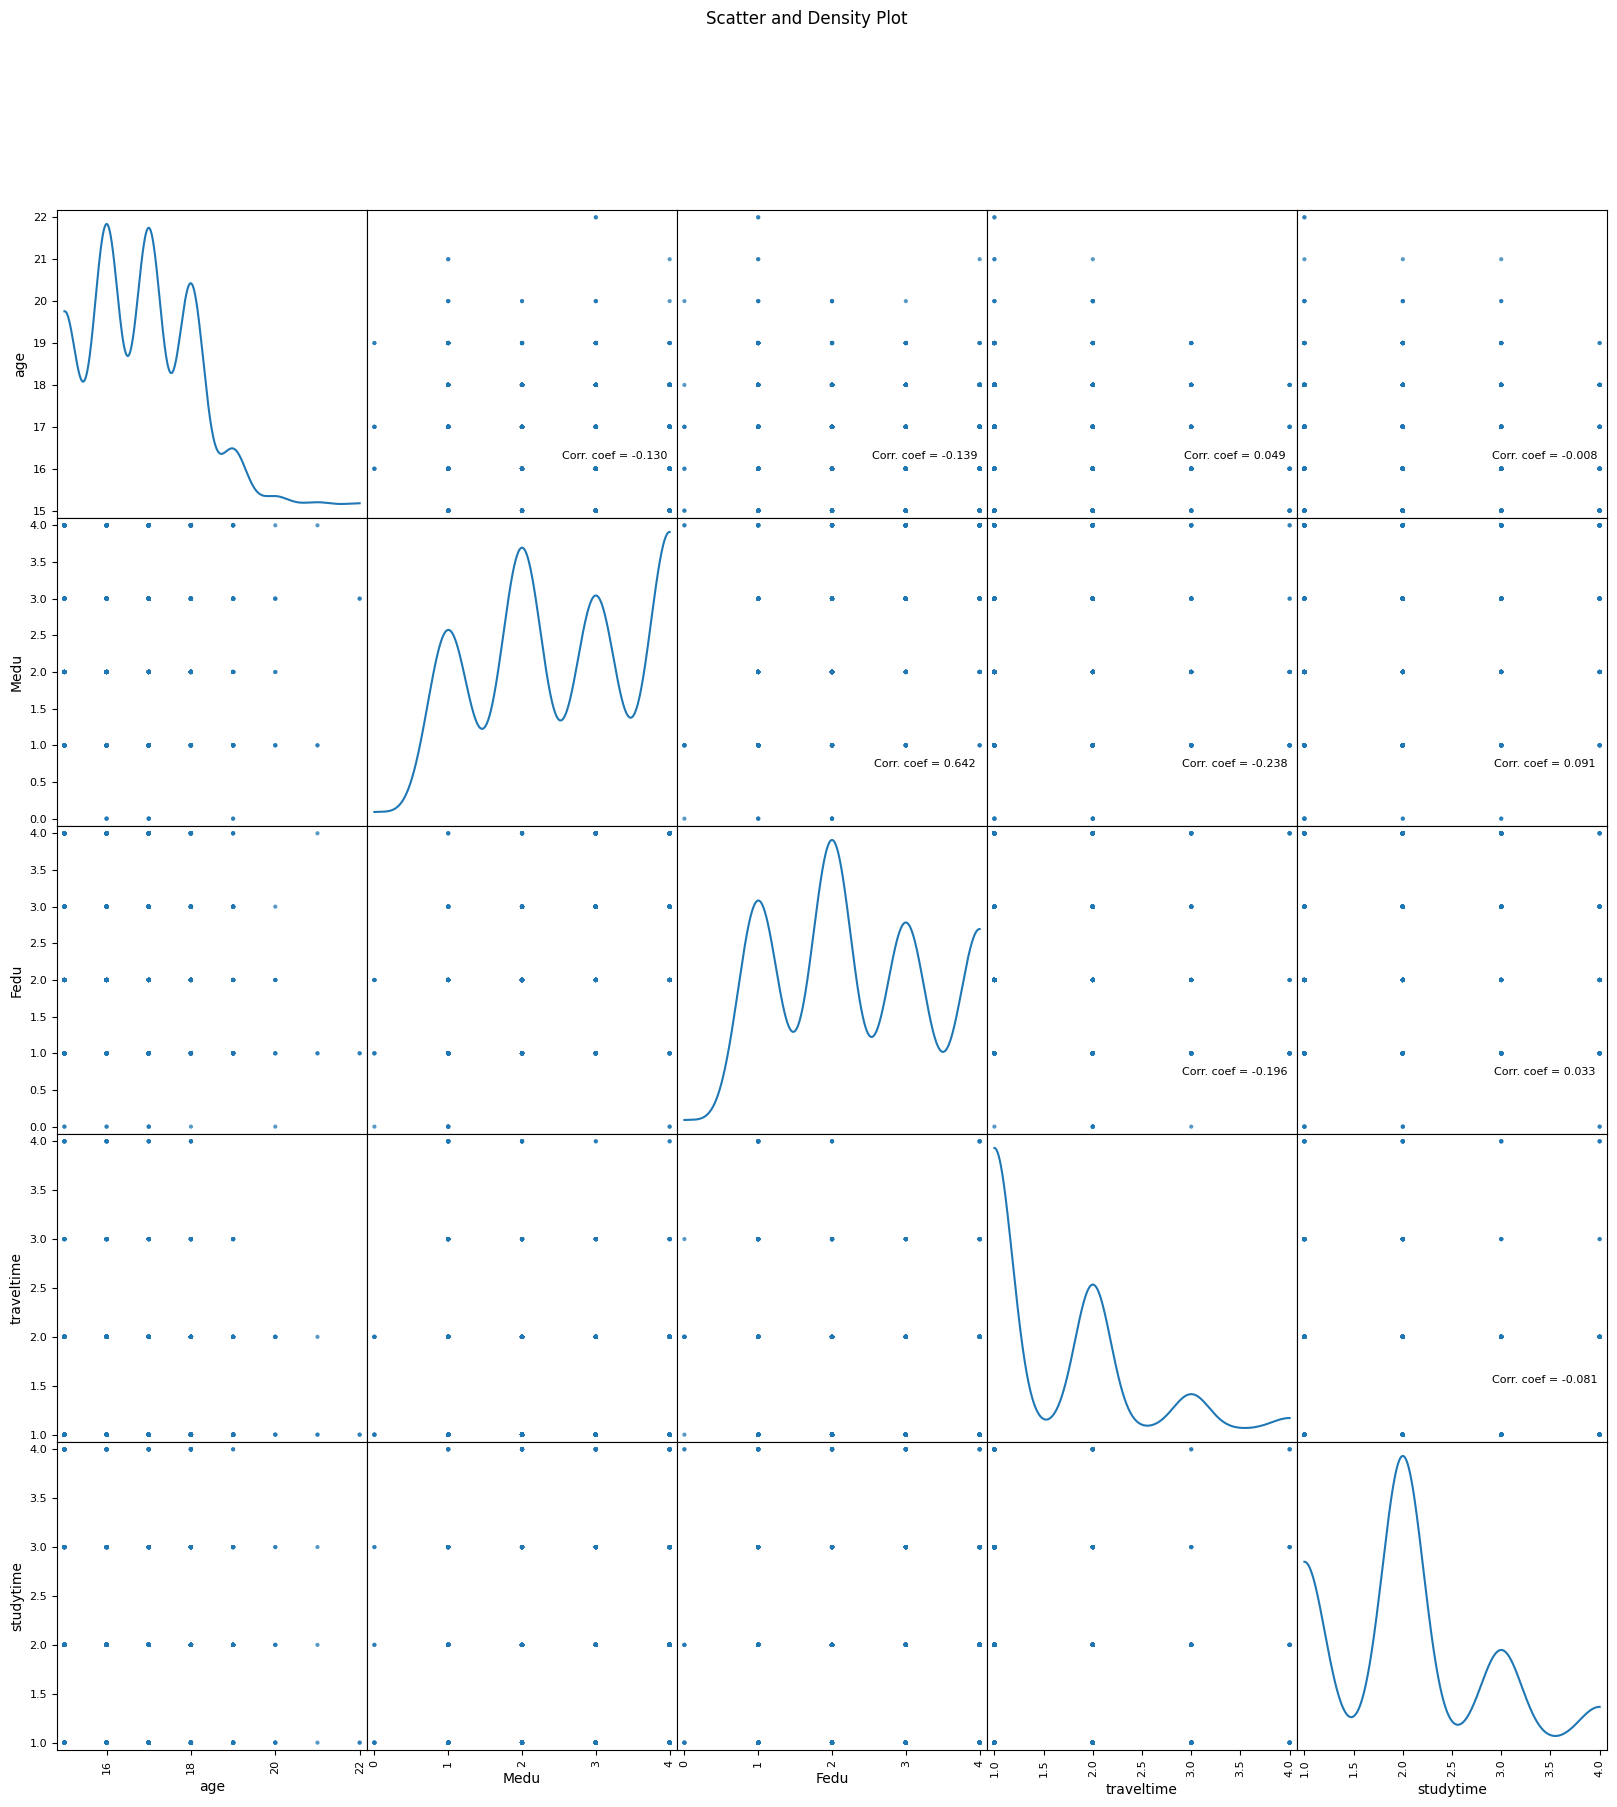

In [19]:
plotScatterMatrix(dataframe_enc,20,8,to_plot[:5])

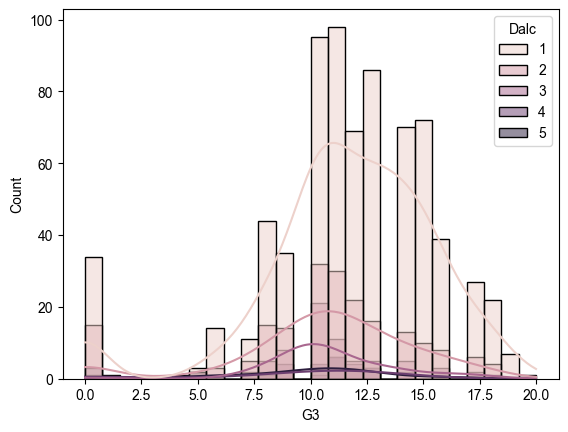

In [20]:
sns.histplot(data = dataframe_enc, x = dataframe_enc['G3'], kde = True, hue = dataframe_enc['Dalc'].sort_values(ascending = True))
sns.set(rc={'figure.figsize':(20,9)})

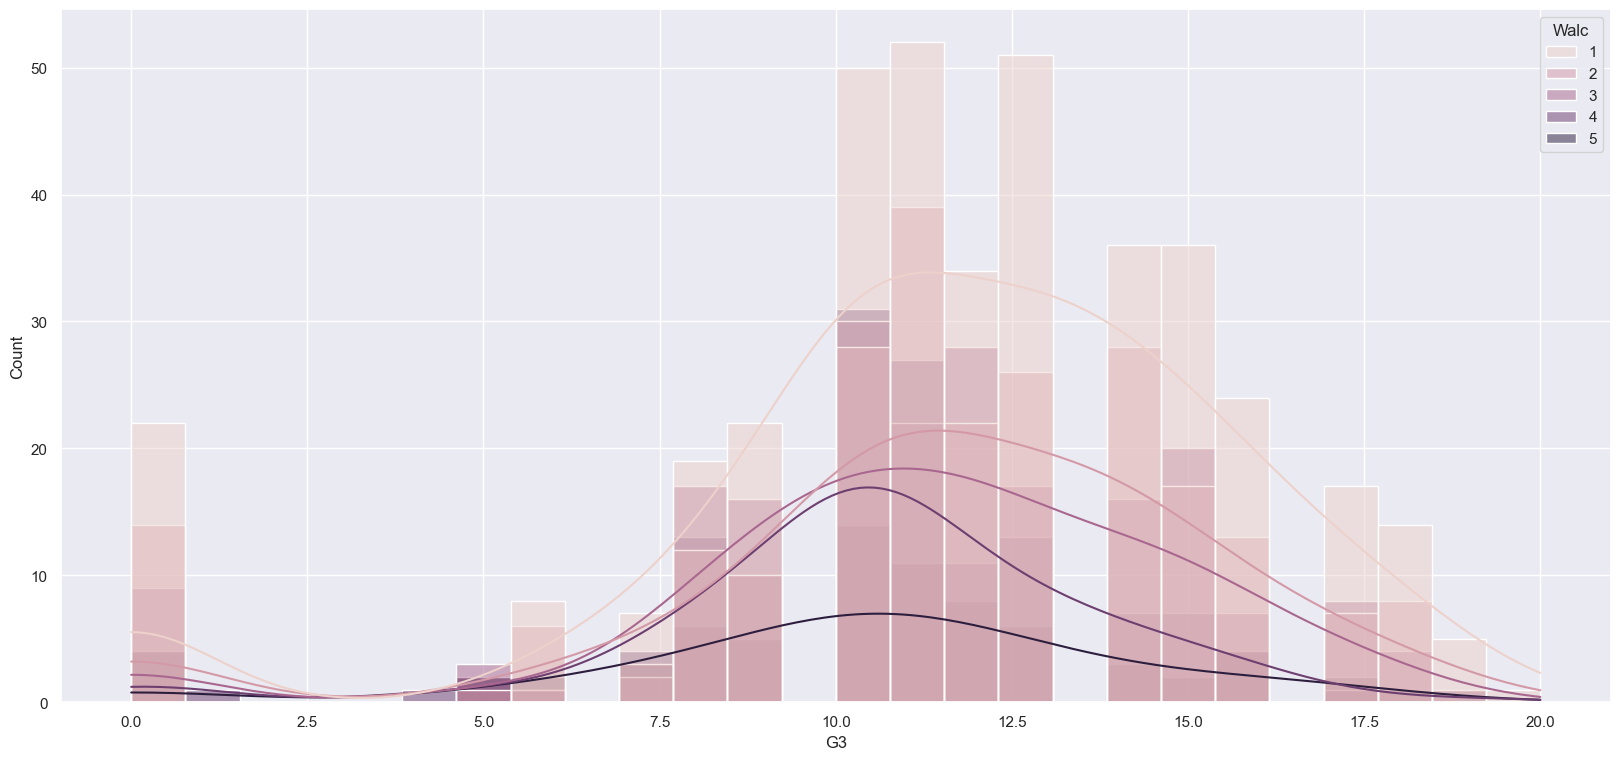

In [21]:
sns.histplot(data = dataframe_enc, x = dataframe_enc['G3'], kde = True, hue = dataframe_enc['Walc'].sort_values(ascending = True))
sns.set(rc={'figure.figsize':(20,9)})

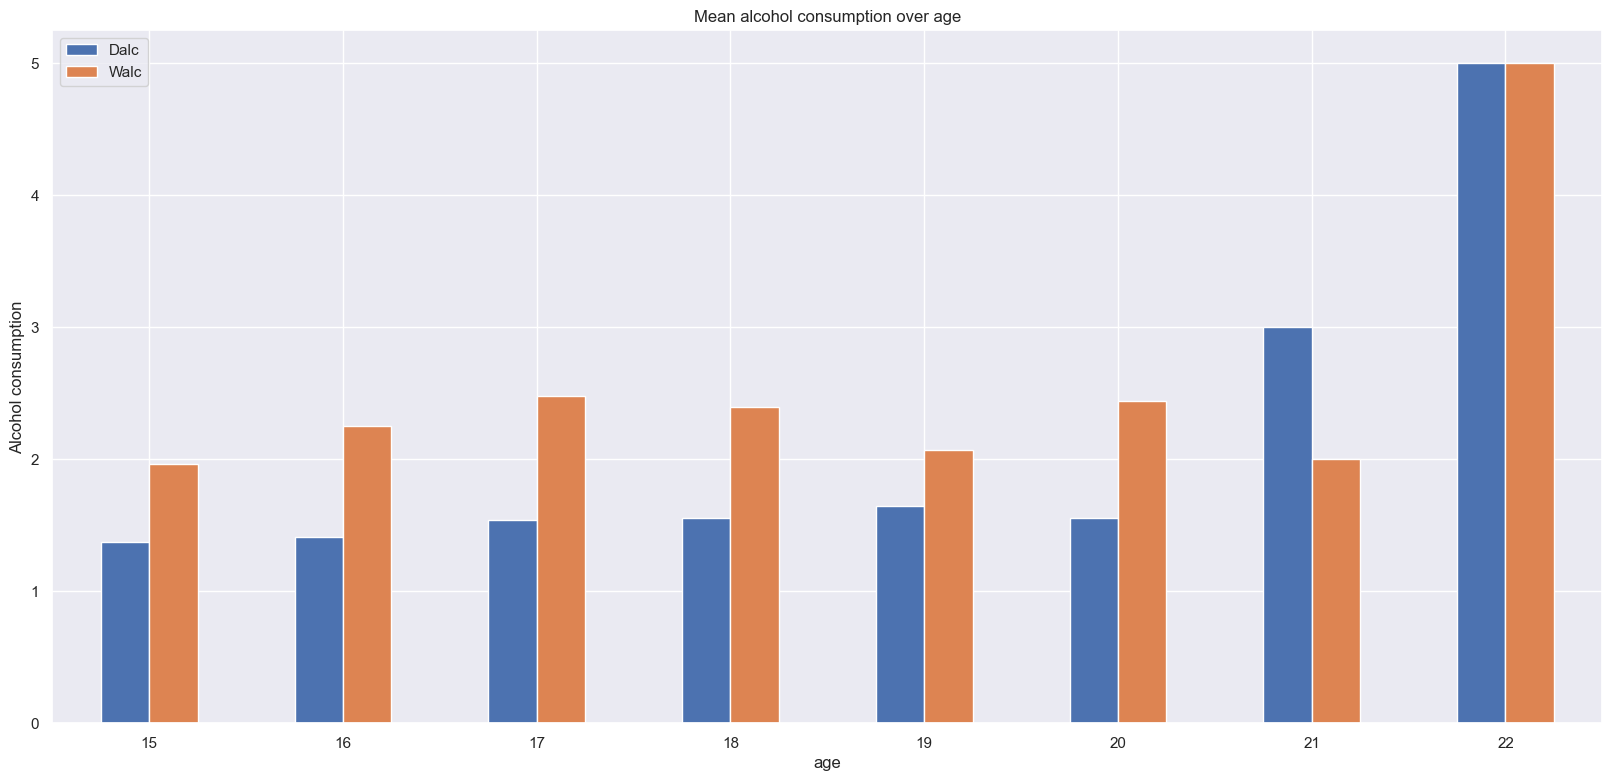

In [22]:
dataframe_enc.groupby('age')[['Dalc', 'Walc']].mean().plot(kind='bar')
plt.ylabel('Alcohol consumption')
plt.xticks(rotation=0)
plt.title('Mean alcohol consumption over age')
plt.show()



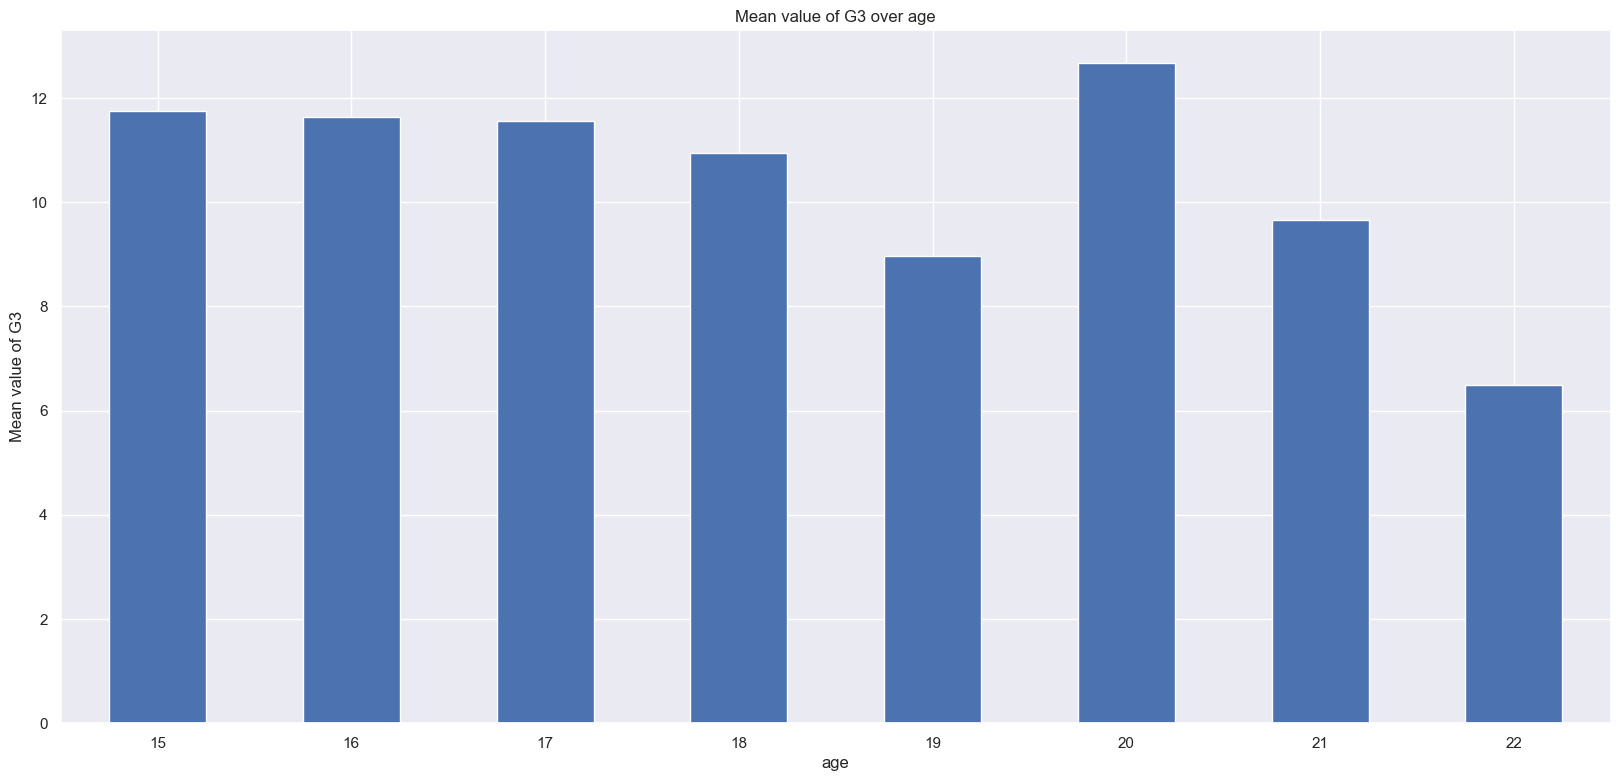

In [23]:
dataframe_enc.groupby('age')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over age')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()



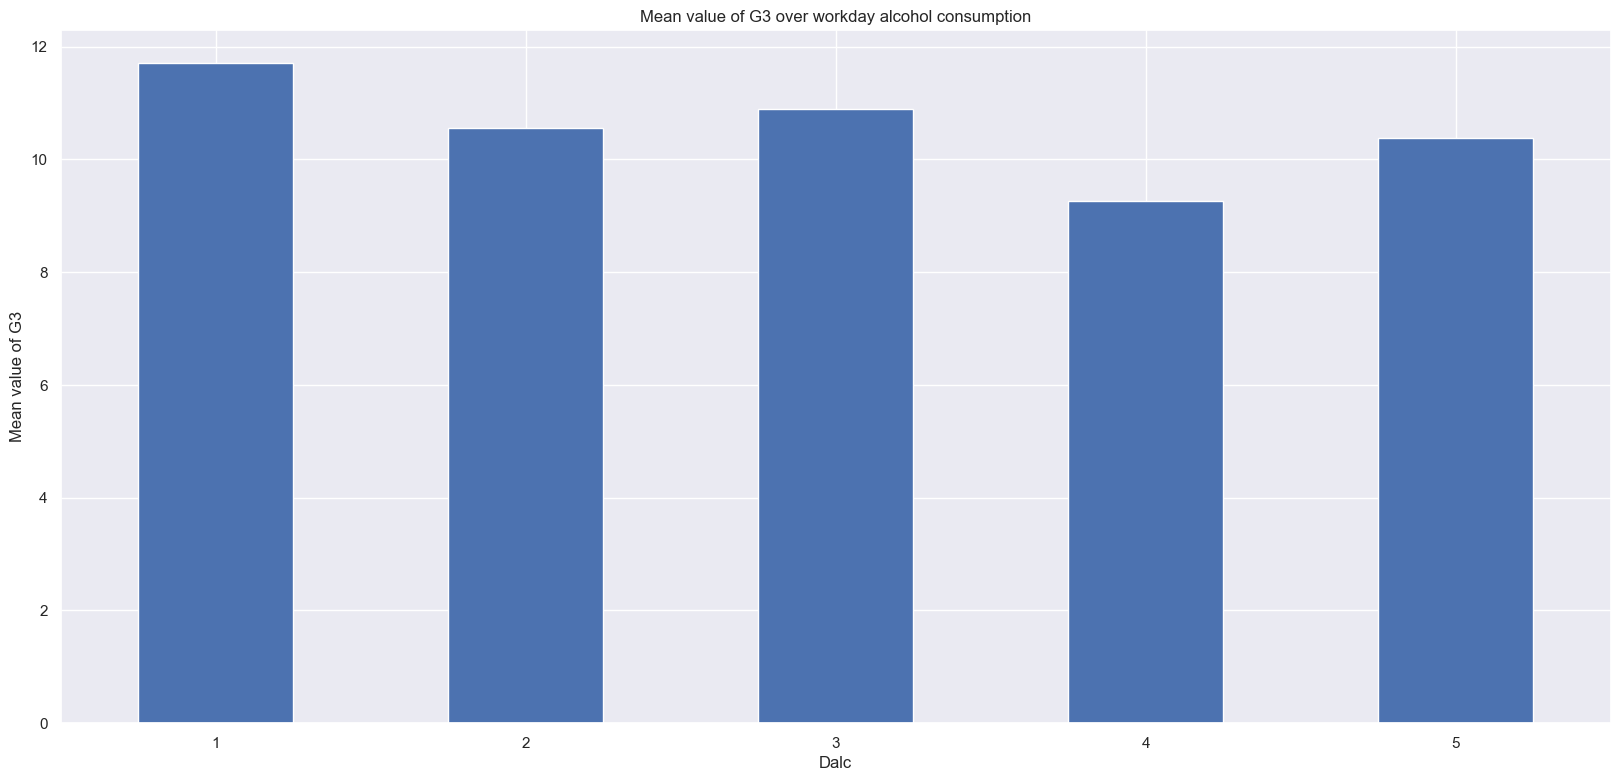

In [24]:
dataframe_enc.groupby('Dalc')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over workday alcohol consumption')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()

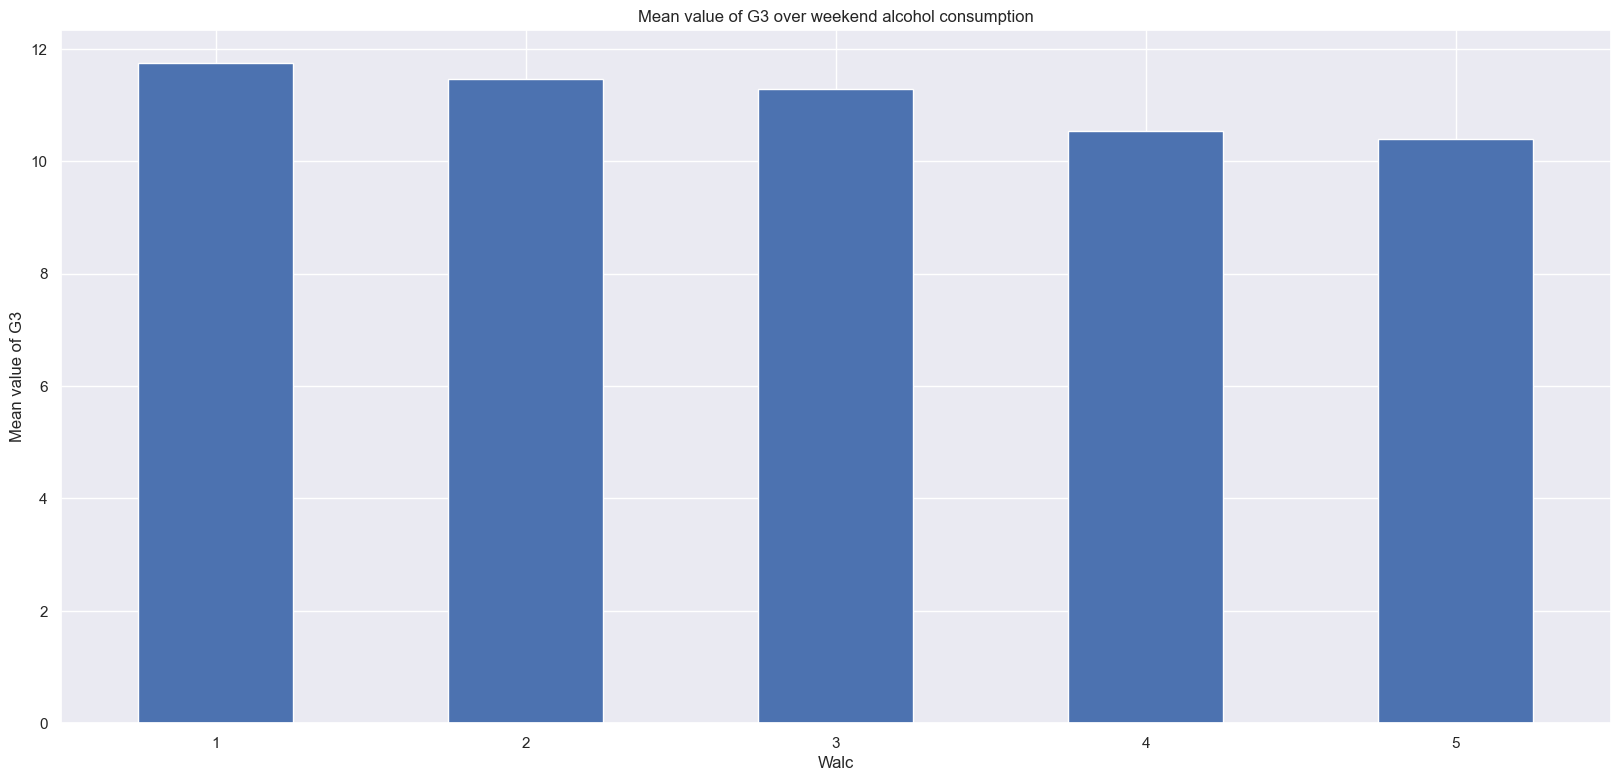

In [25]:
dataframe_enc.groupby('Walc')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over weekend alcohol consumption')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()

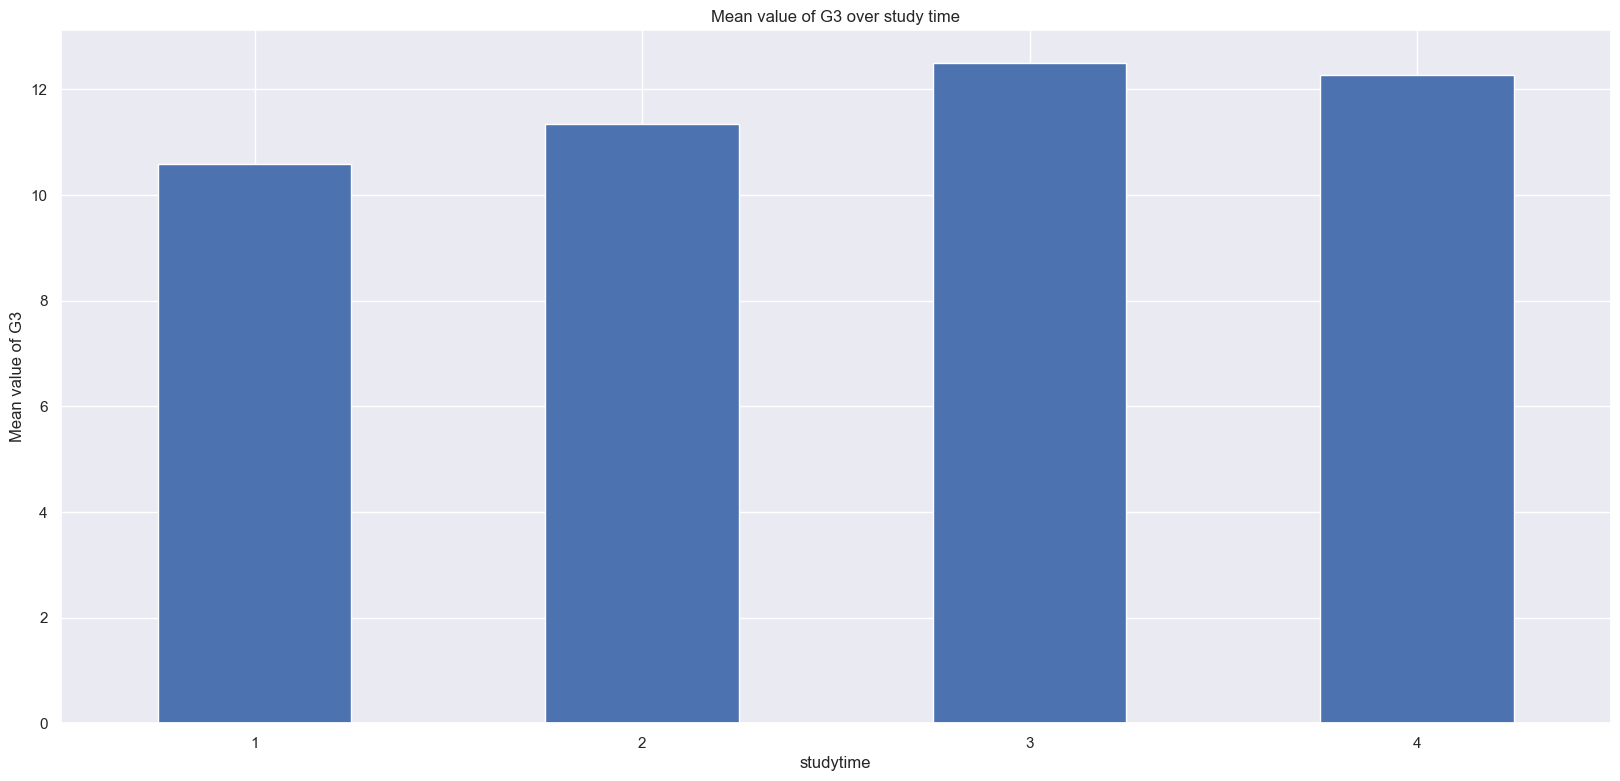

In [26]:
dataframe_enc.groupby('studytime')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over study time')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()

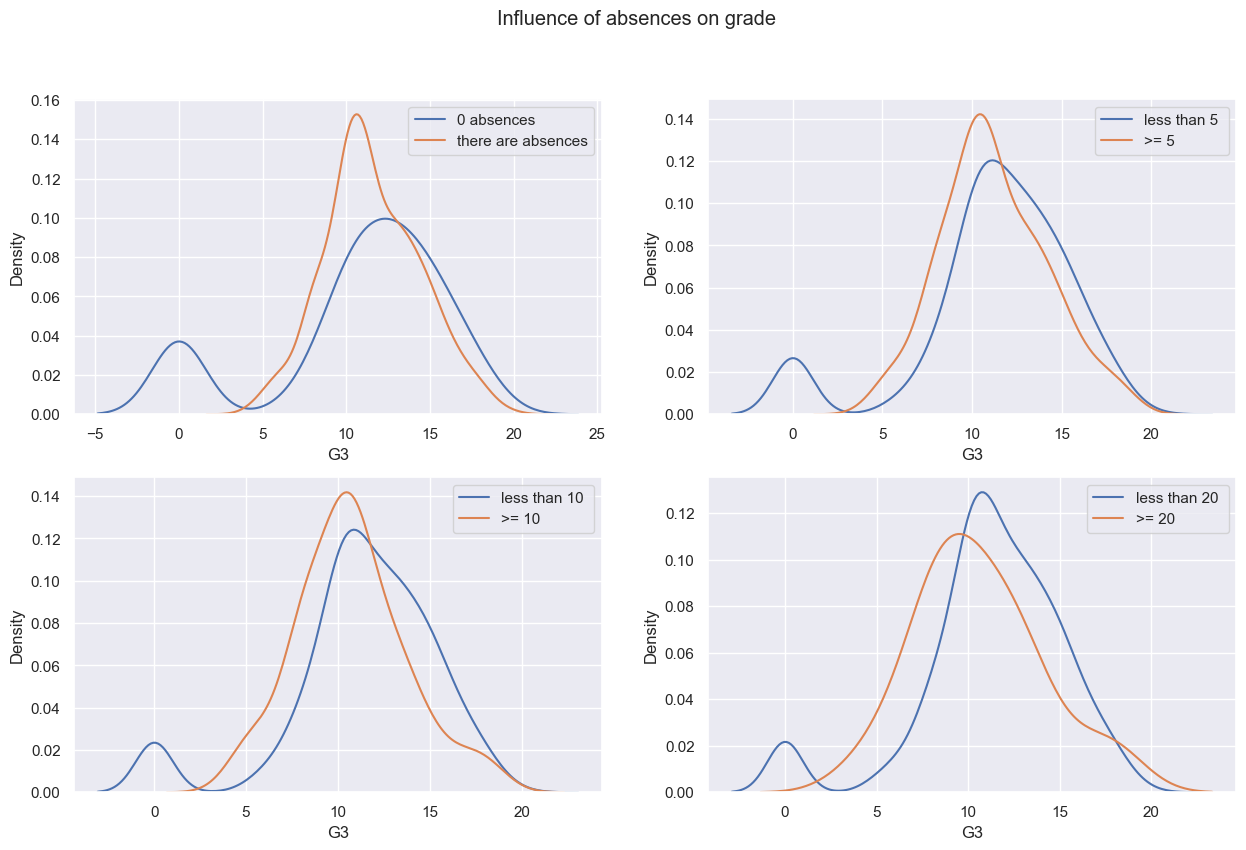

In [27]:
_, axes = plt.subplots(2, 2, figsize=(15,9))
_.suptitle('Influence of absences on grade')
sns.kdeplot(dataframe_enc.query('absences == 0')['G3'], label='0 absences', ax=axes[0, 0])
sns.kdeplot(dataframe_enc.query('absences > 0')['G3'], label='there are absences', ax=axes[0, 0])
axes[0, 0].legend()

sns.kdeplot(dataframe_enc.query('absences < 5')['G3'], label='less than 5 ', ax=axes[0, 1])
sns.kdeplot(dataframe_enc.query('absences >= 5 ')['G3'], label='>= 5', ax=axes[0, 1])
axes[0, 1].legend()

sns.kdeplot(dataframe_enc.query('absences < 10')['G3'], label='less than 10 ', ax=axes[1, 0])
sns.kdeplot(dataframe_enc.query('absences >= 10 ')['G3'], label='>= 10', ax=axes[1, 0])
axes[1, 0].legend()

sns.kdeplot(dataframe_enc.query('absences < 20')['G3'], label='less than 20 ', ax=axes[1, 1])
sns.kdeplot(dataframe_enc.query('absences >= 20 ')['G3'], label='>= 20', ax=axes[1, 1])
axes[1, 1].legend()
plt.show()

In [28]:
# sns.pairplot(dataframe_enc) #~35min

![alt text](./images/pairplotFull.png "")

In [29]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3, random_state=0)
model = cluster.fit(dataframe_enc)

In [30]:
model

KMeans(n_clusters=3, random_state=0)

In [31]:
from yellowbrick.cluster import KElbowVisualizer

def elbow(df,max_cluster_num):
    # Quick examination of elbow method to find numbers of clusters to make.
    print('Elbow Method to determine the number of clusters to be formed:')
    Elbow_M = KElbowVisualizer(KMeans(), k=max_cluster_num)
    Elbow_M.fit(df)
    Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


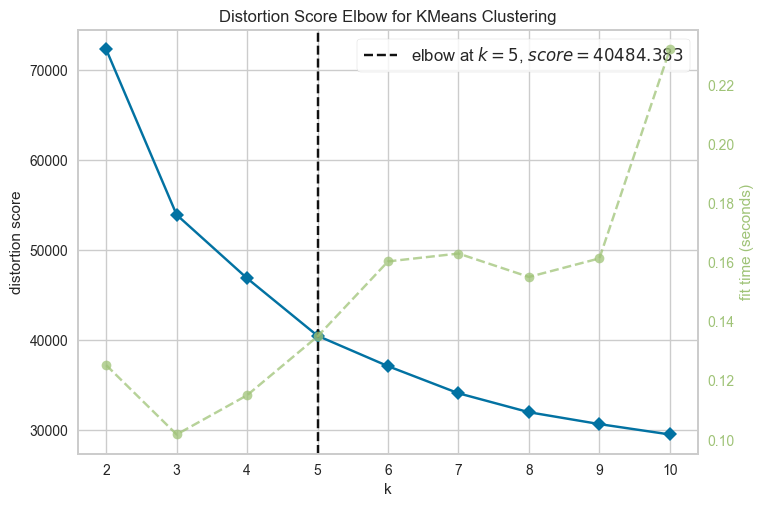

In [32]:
elbow(dataframe_enc,10)

In [33]:
from sklearn.cluster import AgglomerativeClustering

def kmeans_cluster(df,cluster_num):
    dataframe_cluster = df.copy(deep=True)

    AC=KMeans(n_clusters=cluster_num)
    yhat_AC = AC.fit_predict(dataframe_enc)
    dataframe_cluster["Clusters"] = yhat_AC

    #Plotting the clusters
    pl = sns.countplot(x=dataframe_cluster["Clusters"])
    pl.set_title("Distribution Of The Clusters")
    plt.show()
    return dataframe_cluster

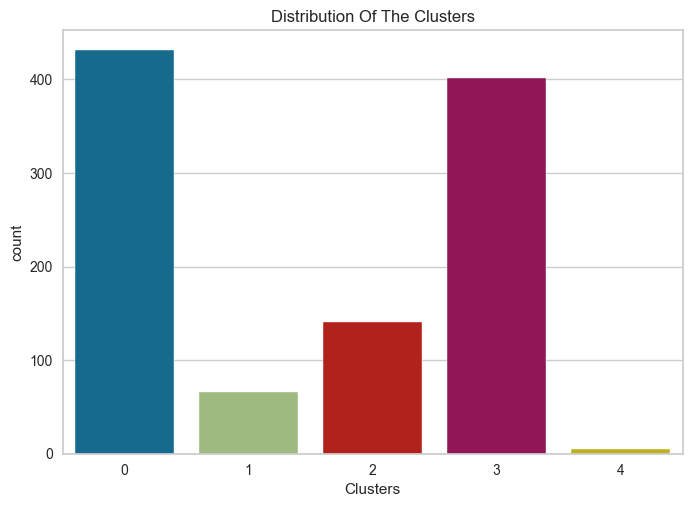

In [34]:
dataframe_clustered= kmeans_cluster(dataframe_enc,5)

In [35]:
dataframe_clustered['Clusters'].value_counts()

0    431
3    401
2    141
1     66
4      5
Name: Clusters, dtype: int64

In [36]:
def box_plot_cluster(df,other_columns):
    for other in other_columns:
        plt.figure()
        pl=sns.boxenplot(y=df[other],x=df["Clusters"], palette=["#FF0000","#00FF00", "#4444FF","#FFFF00","#000000"])
        pl.set_title(other)

        plt.show()


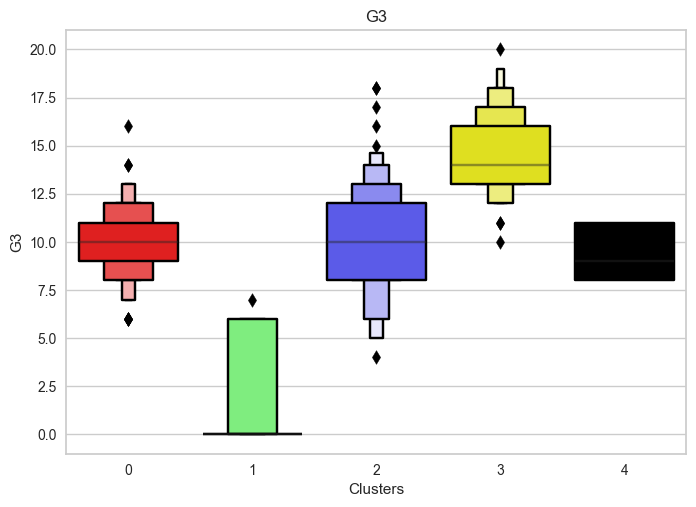

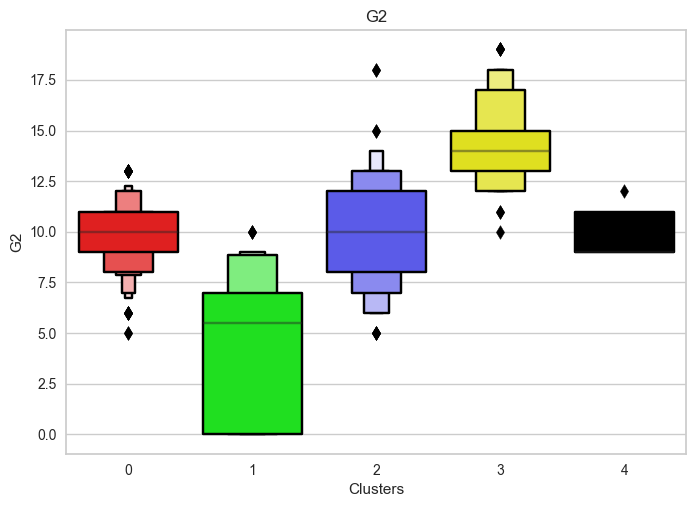

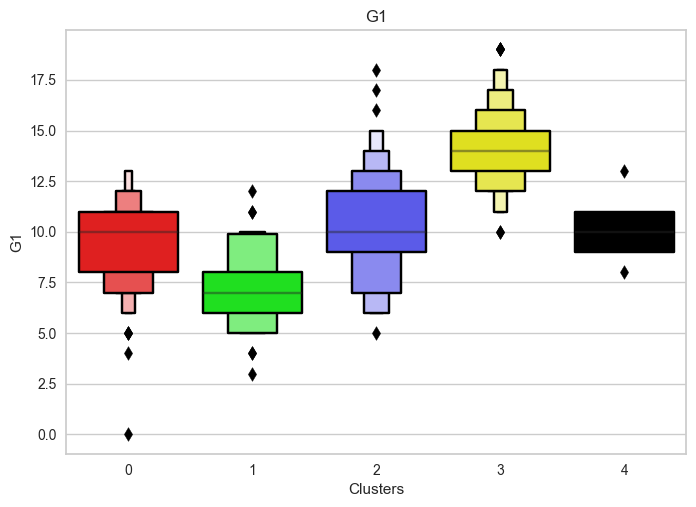

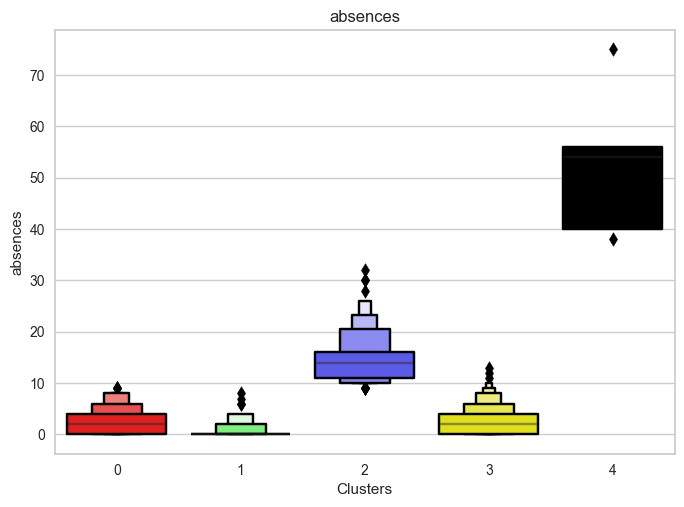

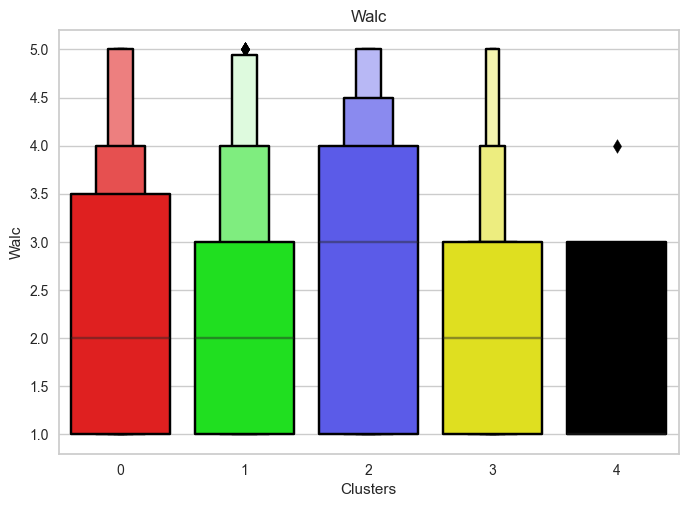

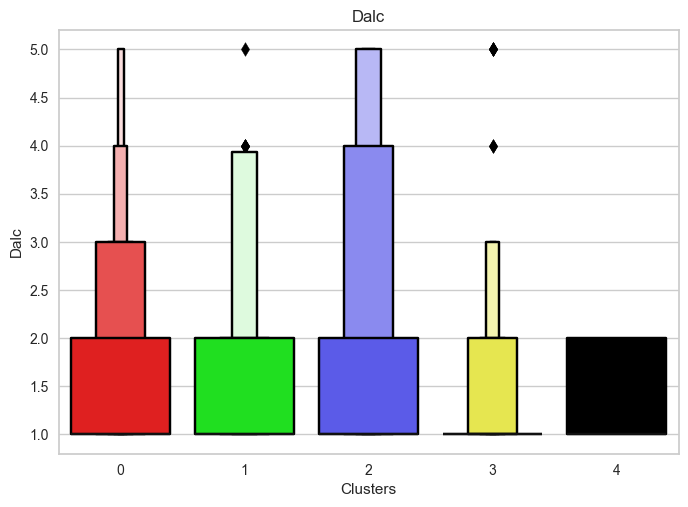

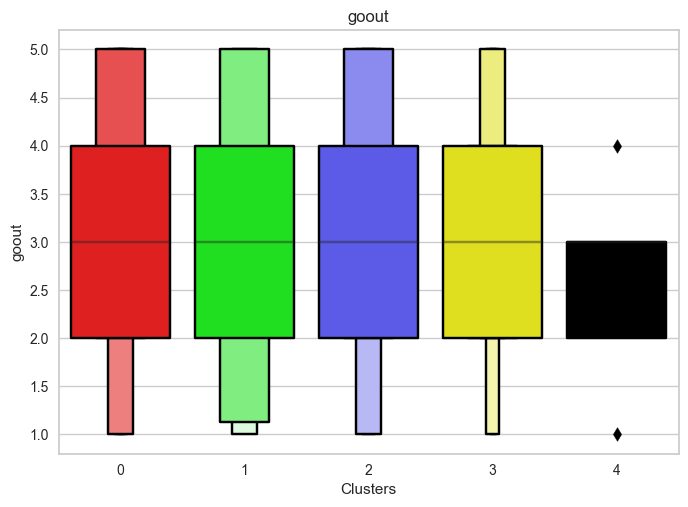

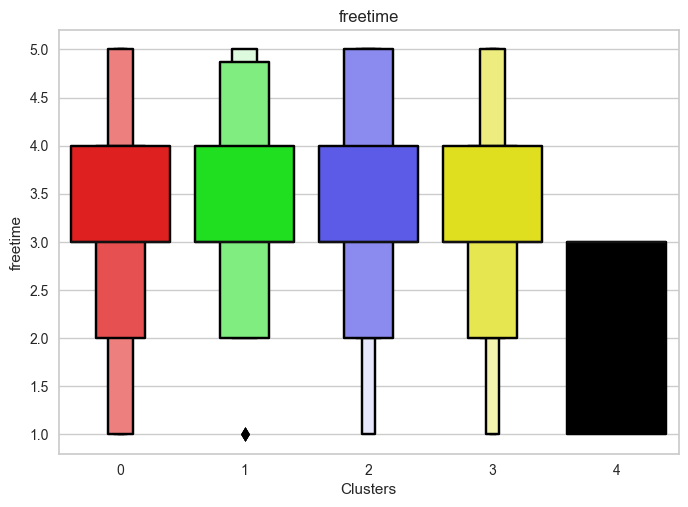

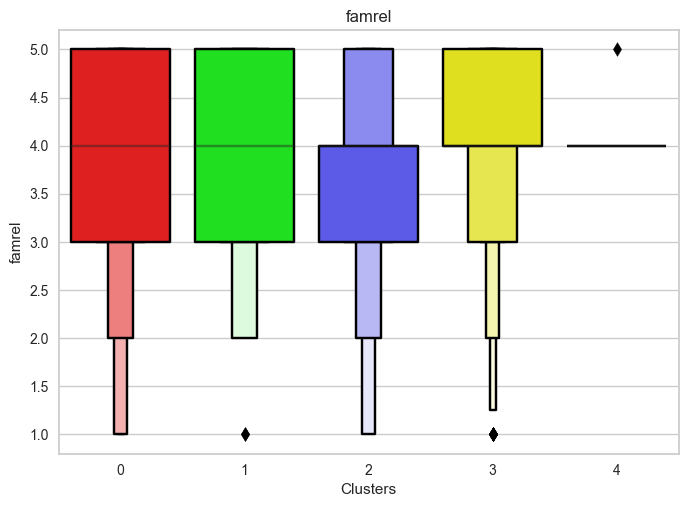

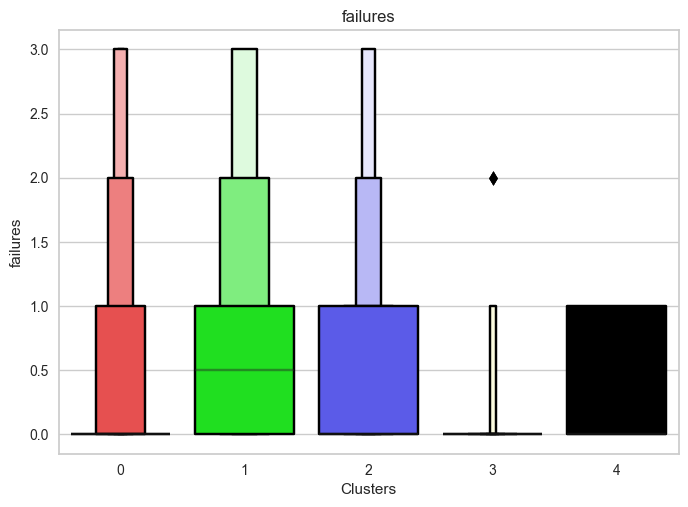

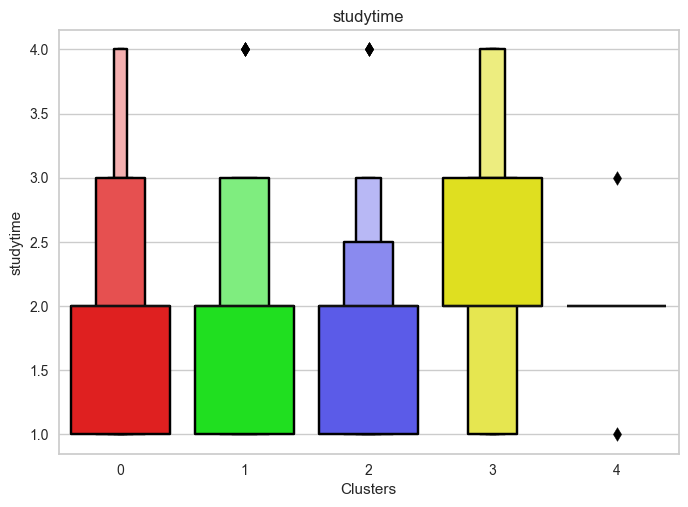

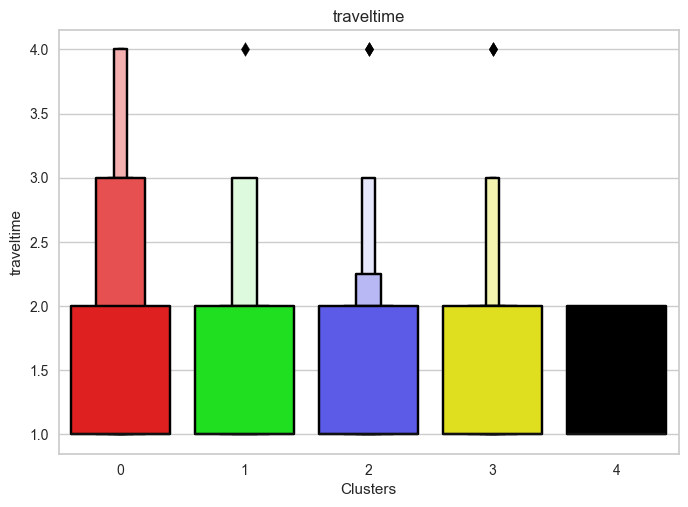

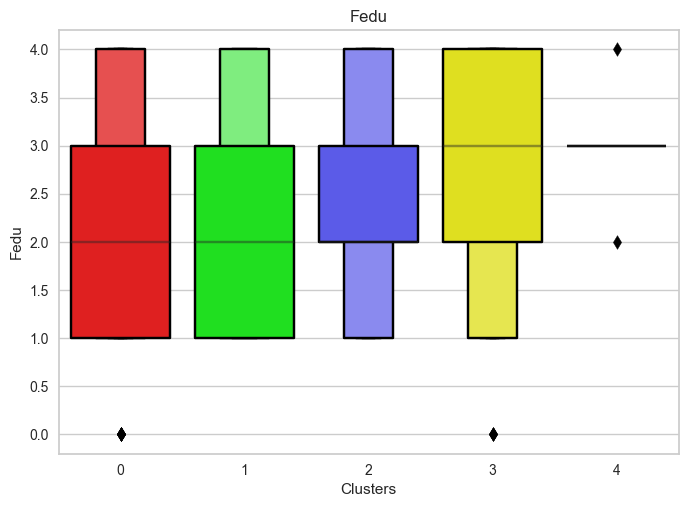

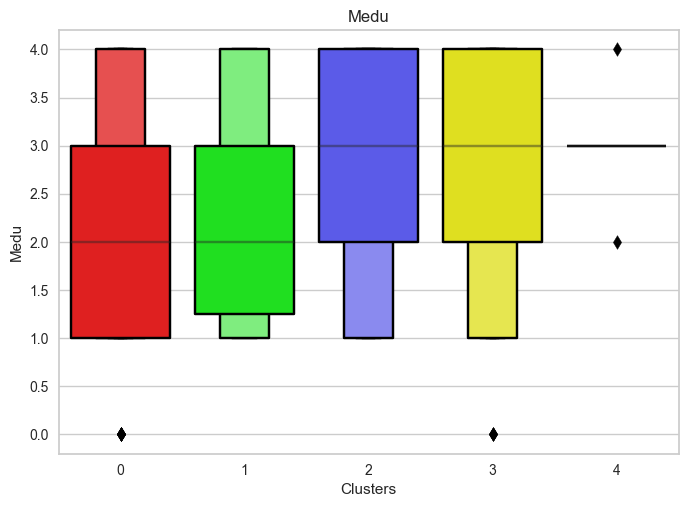

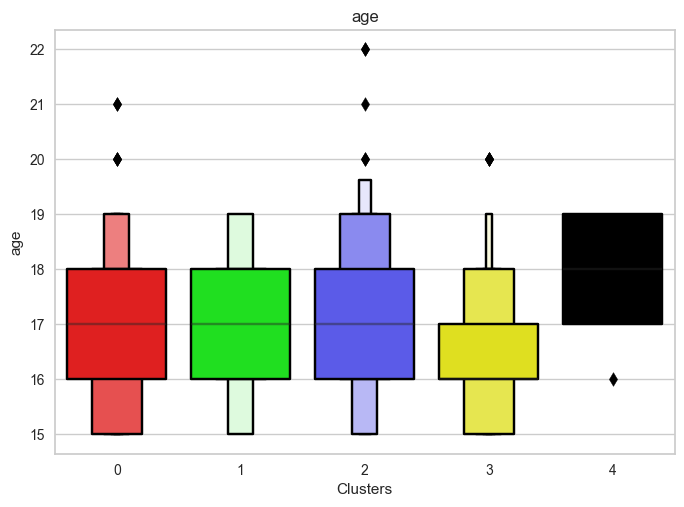

In [59]:
box_plot_cluster(dataframe_clustered,["G3","G2","G1","absences","Walc","Dalc","goout","freetime","famrel","failures","studytime","traveltime","Fedu","Medu","age"])

In [38]:
def joint_plot_cluster(df,main_colum,other_columns):
    for other in other_columns:
        if other == main_colum:
            continue
        pl = sns.jointplot(data = df,x=df[main_colum], y=df[other],hue=df["Clusters"],kind="kde",palette=["#FF0000","#00FF00", "#4444FF","#FFFF00","#000000"])


        plt.show()

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


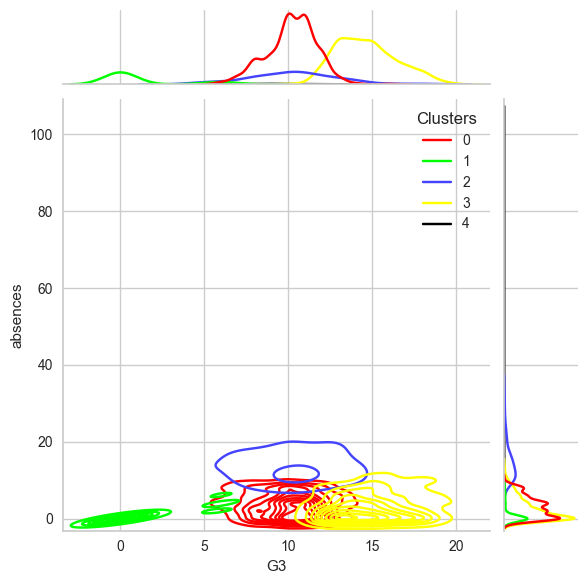

In [39]:
joint_plot_cluster(dataframe_clustered,'G3',["absences"] )

In [55]:
def count_plot_cluster(df,other_columns):
    for other in other_columns:
        df1 = df.groupby('Clusters')[other].value_counts(normalize=True)
        df1 = df1.mul(100)
        df1 = df1.rename('percent').reset_index()
        plt.figure()
        pl = sns.catplot(x='Clusters',y='percent',hue=other,kind='bar',data=df1)
        # pl = sns.countplot(x=df[other],hue=df["Clusters"])
        plt.show()

<Figure size 800x550 with 0 Axes>

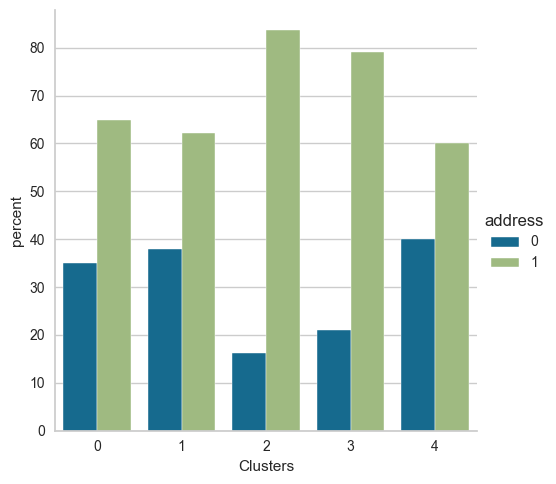

<Figure size 800x550 with 0 Axes>

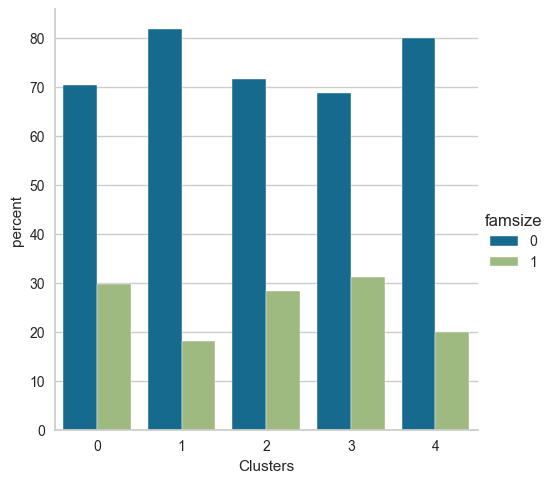

<Figure size 800x550 with 0 Axes>

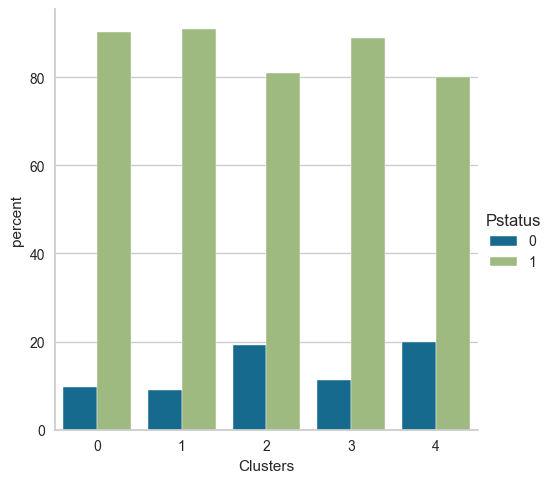

<Figure size 800x550 with 0 Axes>

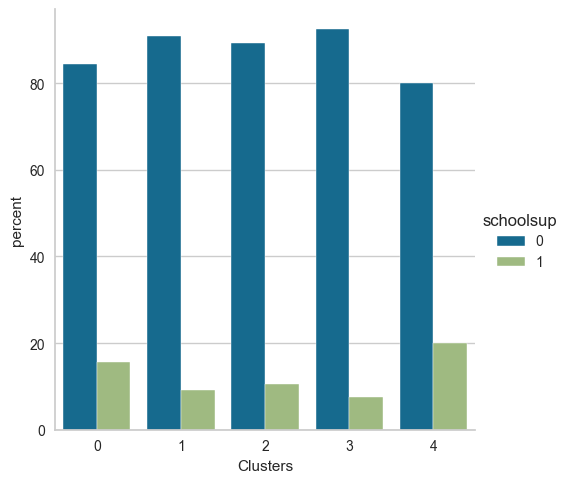

<Figure size 800x550 with 0 Axes>

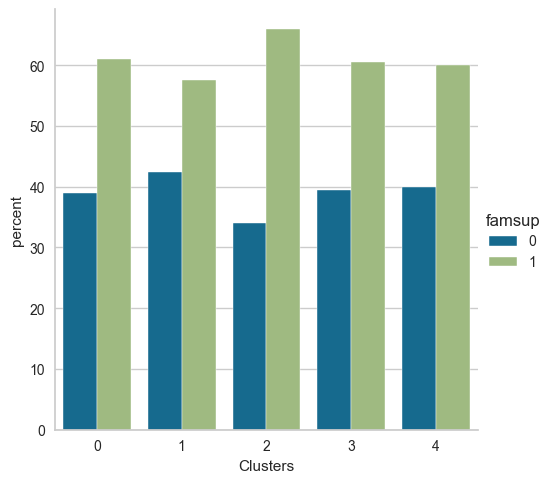

<Figure size 800x550 with 0 Axes>

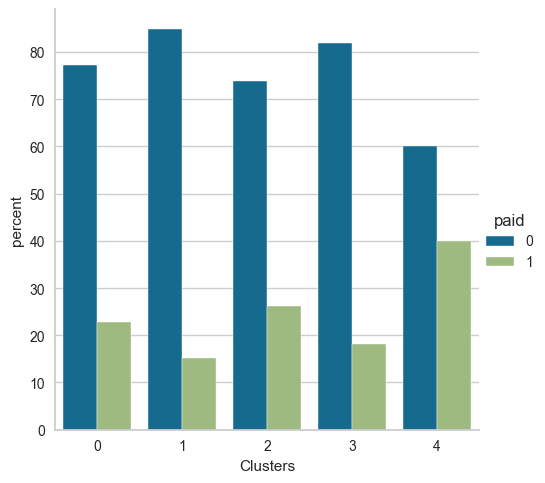

<Figure size 800x550 with 0 Axes>

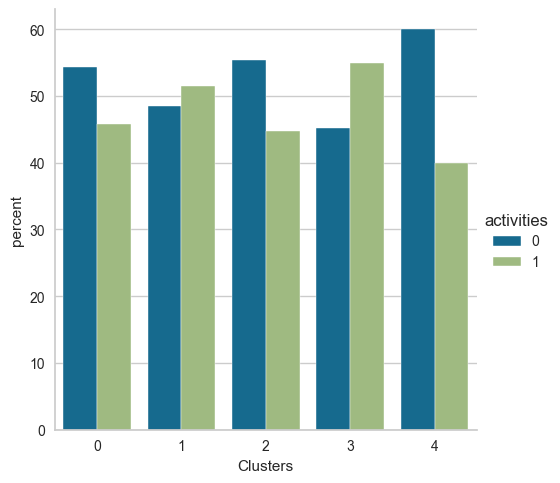

<Figure size 800x550 with 0 Axes>

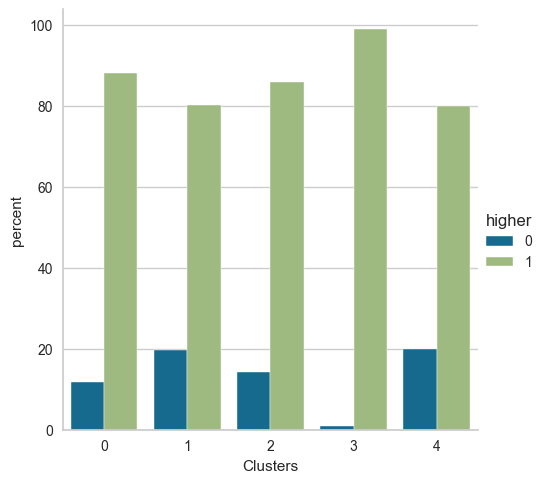

<Figure size 800x550 with 0 Axes>

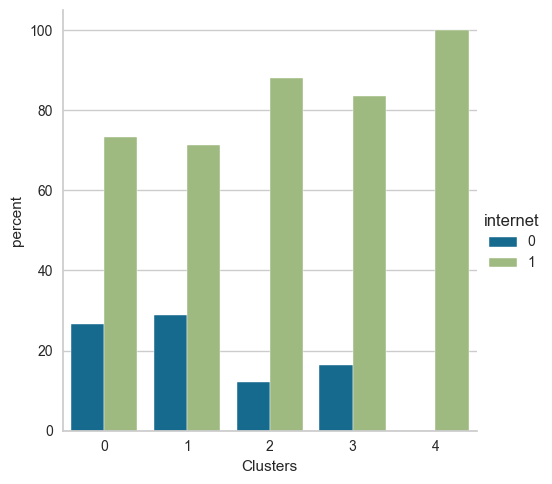

<Figure size 800x550 with 0 Axes>

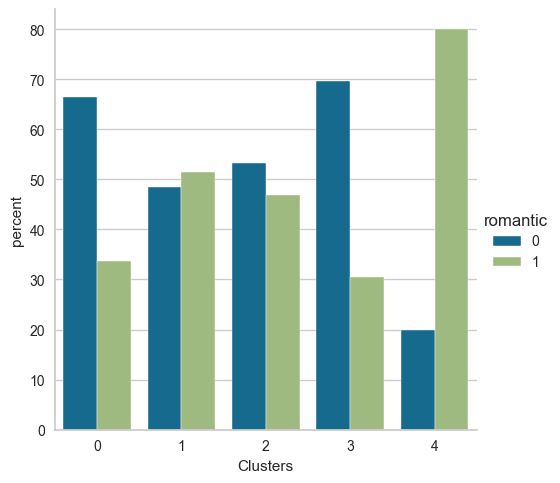

<Figure size 800x550 with 0 Axes>

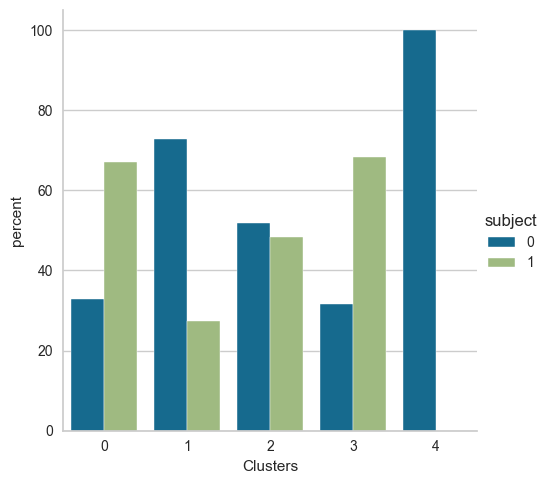

<Figure size 800x550 with 0 Axes>

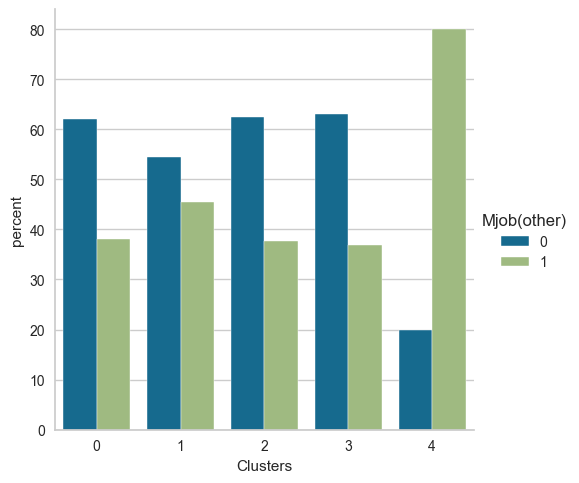

<Figure size 800x550 with 0 Axes>

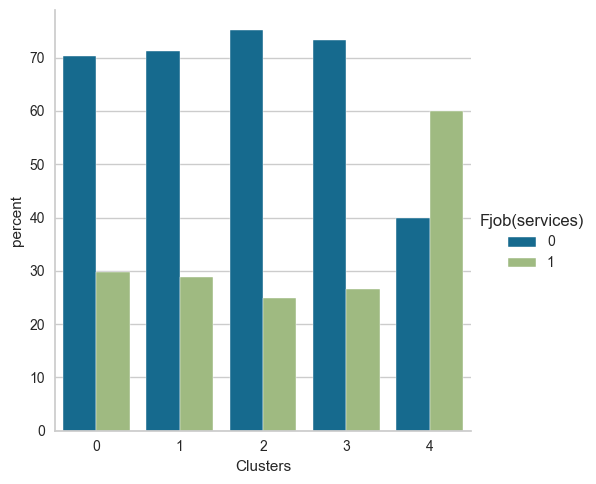

<Figure size 800x550 with 0 Axes>

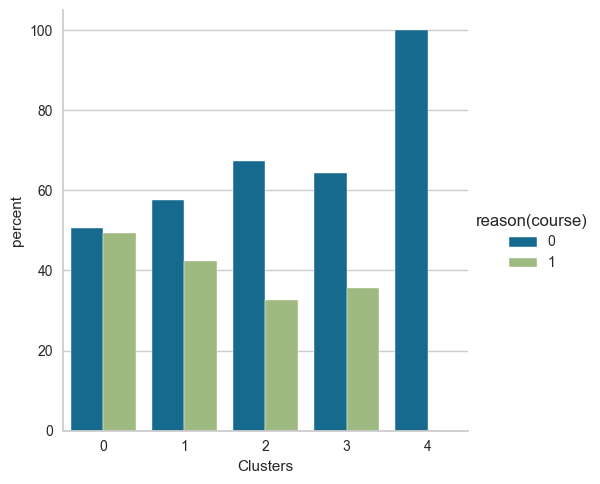

<Figure size 800x550 with 0 Axes>

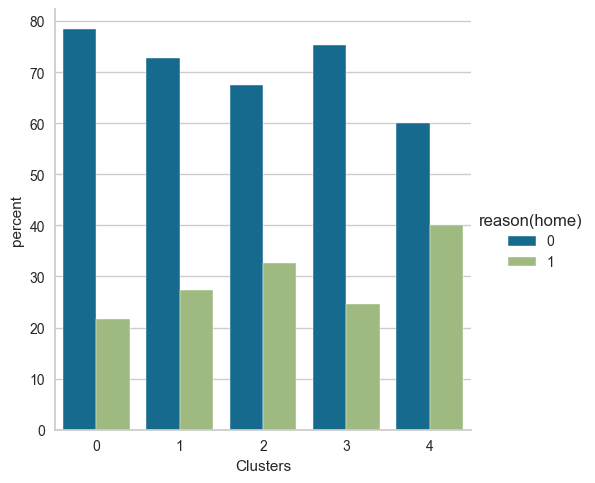

<Figure size 800x550 with 0 Axes>

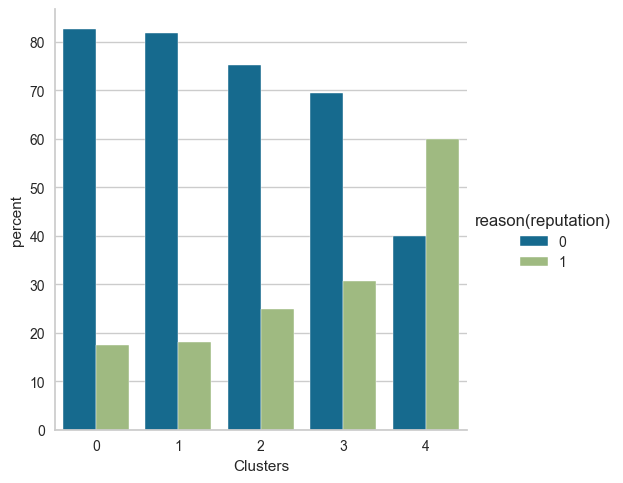

<Figure size 800x550 with 0 Axes>

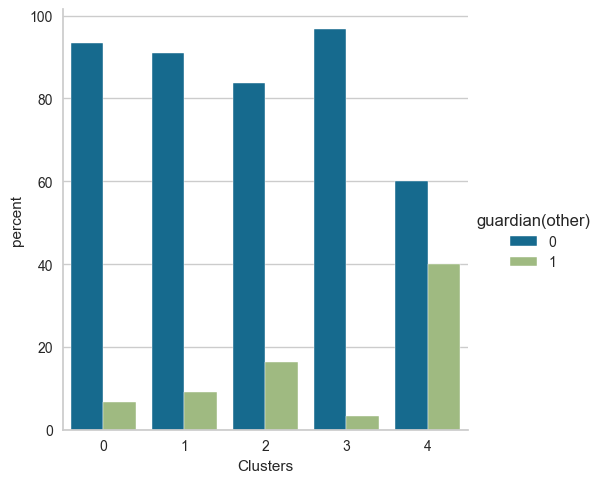

In [60]:
count_plot_cluster(dataframe_clustered,['address','famsize','Pstatus','schoolsup','famsup','paid','activities','higher'
                                    ,'internet','romantic','subject','Mjob(other)','Fjob(services)','reason(course)'
                                    ,'reason(home)','reason(reputation)','guardian(other)'])

In [49]:
dataframe_clustered.groupby("Clusters").median()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,Mjob(at_home),Mjob(health),Mjob(other),Mjob(services),Mjob(teacher),Fjob(at_home),Fjob(health),Fjob(other),Fjob(services),Fjob(teacher),reason(course),reason(home),reason(other),reason(reputation),guardian(father),guardian(mother),guardian(other)
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,17.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,10.0,10.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,17.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,0.5,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0,2.0,4.0,0.0,7.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,17.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,3.0,4.0,14.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,16.0,1.0,0.0,1.0,3.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,14.0,14.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,18.0,1.0,0.0,1.0,3.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,4.0,54.0,10.0,9.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
def mark_other_as_categorical(df,non_categoiric_columns):
    new_df= df.copy(deep=True)
    for col in filter(lambda x: x not in non_categoiric_columns,new_df.columns):
        new_df[col]=new_df[col].astype('category')
    
    return new_df

In [46]:
dataframe_clustered_caterigical=mark_other_as_categorical(dataframe_clustered,
                                                                        ["age", "Medu", "Fedu","traveltime","studytime","failures","famrel",
                                                                        "freetime","goout","Dalc","Walc","health","absences","G1","G2","G3",])

In [47]:
def get_student_type(df):
    new_df= df.groupby("Clusters").mean(numeric_only=True)

    df_list=[]
    for i in range(new_df.shape[0]):
        df_list.append(df[df['Clusters']==i])
    

    for col in filter(lambda x: df[x].dtype=='category' and x!='Clusters' ,df.columns):
        array=[]
        for currnet_df in df_list:
        
            x=list(currnet_df[col])

            array.append( max(x,key=x.count))

        #da l treba???
        if not all(element == array[0] for element in array):
            new_df[col]=array

    return new_df

            #testt
            # # # x=list(currnet_df[col])
            # # # print(currnet_df[col].value_counts())

            # # # print(
            # # #     max(x,key=x.count)
            # # #     # currnet_df[col].count().max()
            # # #     )


            # # # print(col)
            # # # print(currnet_df.shape)
            # # # print("------------------------")


In [48]:
student_types=get_student_type(dataframe_clustered_caterigical)
student_types.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,activities,romantic,subject,Mjob(other),Fjob(other),Fjob(services),reason(reputation)
Clusters,,,,,,,,,,,,,,,,,,,,,,,
0,16.656613,2.336427,2.176334,1.649652,1.865429,0.324826,3.914153,3.201856,3.197216,1.559165,2.429234,3.672854,3.020882,9.529002,9.858469,10.206497,0,0,1,0,1,0,0
1,17.196970,2.378788,2.196970,1.621212,1.848485,0.787879,3.878788,3.272727,3.272727,1.560606,2.212121,3.742424,0.681818,7.166667,4.727273,1.090909,1,1,0,0,1,0,0
2,17.234043,2.659574,2.397163,1.425532,1.836879,0.503546,3.780142,3.276596,3.347518,1.879433,2.730496,3.595745,14.581560,10.290780,10.070922,10.276596,0,0,0,0,1,0,0
3,16.531172,2.902743,2.635910,1.406484,2.149626,0.027431,4.019950,3.174564,3.032419,1.279302,1.987531,3.351621,2.403990,14.027431,14.239401,14.648379,1,0,1,0,1,0,0
4,17.800000,3.000000,3.000000,1.400000,2.000000,0.400000,4.200000,2.200000,2.600000,1.400000,2.000000,3.600000,52.600000,10.200000,10.000000,9.400000,0,1,0,1,0,1,1


Izvedeni zaključci

grupa 0:
        Seoski prosecni djaci, koji pohadjaju nastavu i uce malo vise 

grupa 1:
        Losi djaci iz needukovanih porodica

grupa 2:
        Gradski prosecni djaci, vise piju, odsustrvuju i imaju gore odnose u porodici. Uce manje u odnosu na grupu 0 (iste ocene)

grupa 3:
        Odlicni djaci iz stabilnih edukovanih porodica. Najambiciozniji i najvise uce

grupa 4:
        Stariji(~20) studenti koji ne piju, ne izlaze, najmanje slobodnog vremena, najmanje uce i znatno vise odsustvuju (verovatno rade?).
        Placaju privatne casove i vecina njih je u vezi.
